In [1]:
import pandas as pd 
import numpy as np

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
df[df.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [9]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


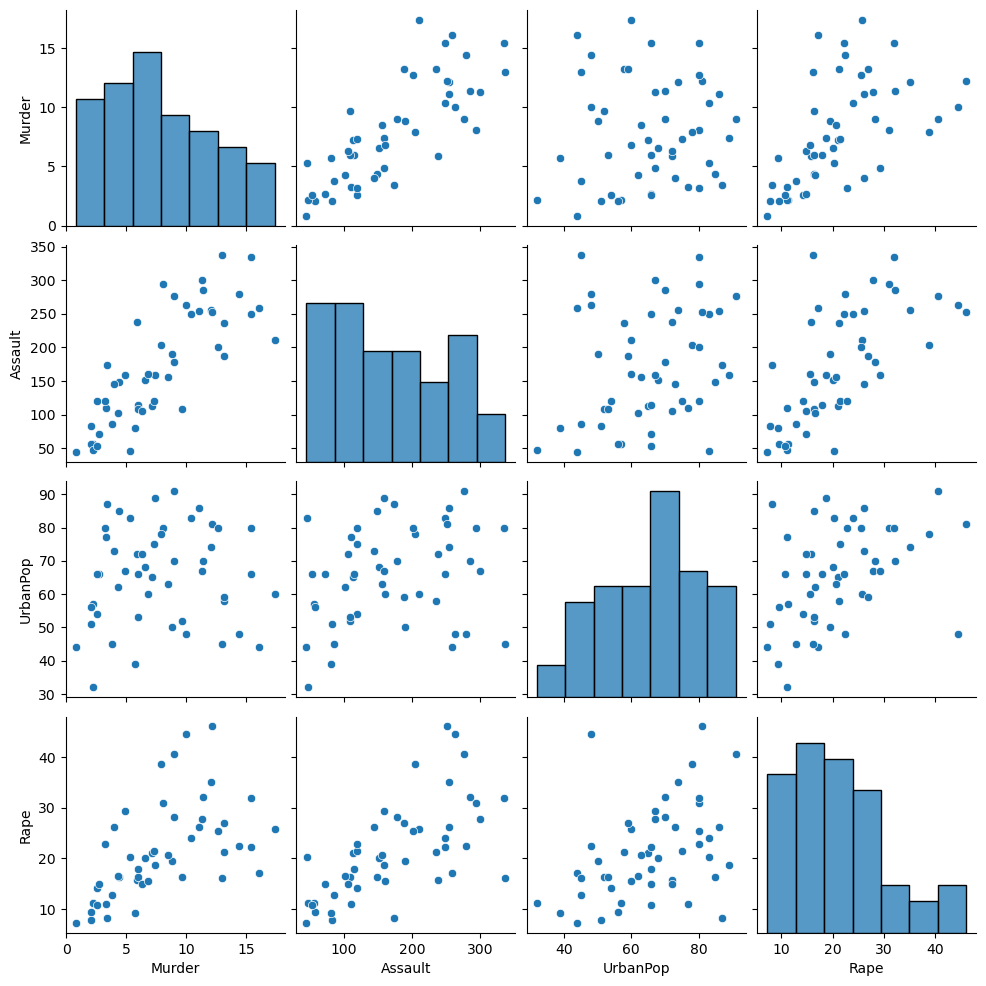

In [10]:
import seaborn as sns
sns.pairplot(df)

# K - Clustering

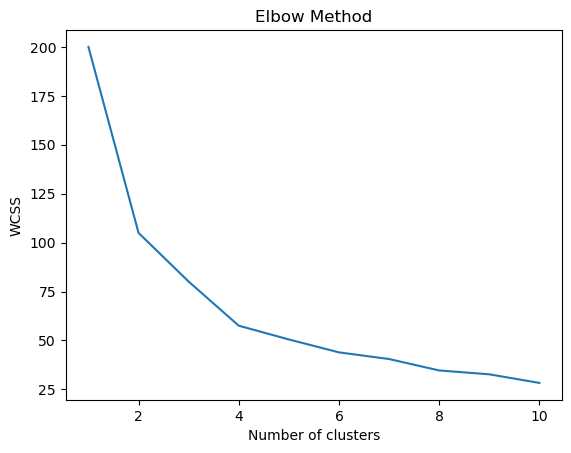

In [11]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wcss = []
scaled_df = scaler.fit_transform(df.iloc[:,1 :])
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# build cluster algorithm 
from sklearn.cluster import KMeans
clusters = KMeans(6,random_state=42)
clusters.fit(scaled_df)

KMeans(n_clusters=6, random_state=42)

In [13]:
clusters.labels_

array([4, 0, 2, 1, 2, 2, 5, 1, 2, 4, 5, 3, 2, 1, 3, 1, 1, 4, 3, 2, 5, 2,
       3, 4, 2, 1, 1, 2, 3, 5, 2, 2, 4, 3, 5, 1, 1, 5, 5, 4, 3, 4, 2, 5,
       3, 1, 5, 3, 3, 1])

In [14]:
# assign clusters to the data set 
df['clusters_new ']= clusters.labels_

In [15]:
clusters.cluster_centers_

array([[ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [-0.23125052, -0.30342672, -0.27242367, -0.23973789],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511]])

In [16]:
df 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters_new
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,5
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,4


# DBSCAN 

In [17]:
from sklearn.cluster import DBSCAN


In [18]:
#import file
db_df = pd.read_csv('crime_data.csv')

In [19]:
db_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
db_df1 = db_df.drop('Unnamed: 0',axis=1)

In [21]:
db_df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [22]:
array = db_df1.values

In [23]:
stscalar = StandardScaler().fit(array)
X = stscalar.transform(array)

In [24]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [25]:
dbscan = DBSCAN(eps=0.8,min_samples=6)

In [26]:
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [27]:
# Noisy labels are given the label -1
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [28]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [29]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [30]:
pd.concat([db_df,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


# Hierarchy

In [31]:
# import file 
hi_df = pd.read_csv('crime_data.csv')

In [32]:
hi_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [33]:
# normalization 
def norm_fun(i) : 
    x = (i-i.mean())/(i.std())
    return(x)

In [34]:
# Normalized data frame 
df_norm =norm_fun(hi_df.iloc[:,1:])

In [35]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820


In [36]:
from scipy.cluster.hierarchy import linkage

In [37]:
import scipy.cluster.hierarchy as sch 
type (df_norm)

pandas.core.frame.DataFrame

In [38]:
z = linkage(df_norm,method='complete',metric='euclidean')

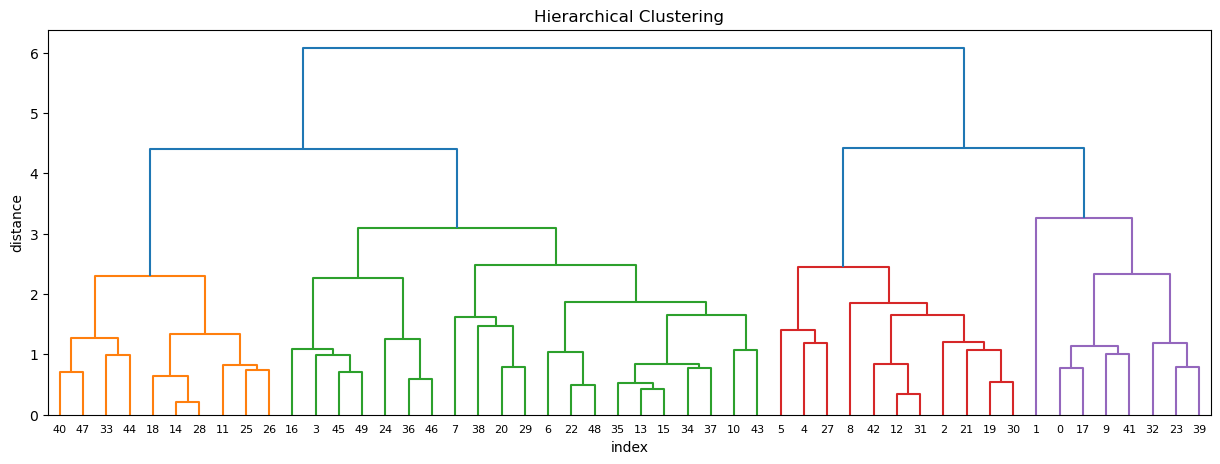

In [44]:
plt.figure(figsize=(15,5))
plt.title("Hierarchical Clustering")
plt.xlabel('index')
plt.ylabel('distance')
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8.)
plt.show()

In [40]:
# create clusters 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [41]:
# save clusters for chart 
y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc,columns=['Clusters'])

In [42]:
hi_df['h_clustid']=Clusters

In [43]:
hi_df.sort_values('h_clustid')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clustid
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
9,Georgia,17.4,211,60,25.8,0
1,Alaska,10.0,263,48,44.5,0
41,Tennessee,13.2,188,59,26.9,0
43,Utah,3.2,120,80,22.9,1
38,Rhode Island,3.4,174,87,8.3,1
